# Heart Failure Prediction with XGBoost Random Forest Ensemble

In [82]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

In [83]:
RANDOM_STATE = 55 #For reproducibility

### Load Data

In [84]:
data = pd.read_csv("heart.csv")

### Data Engineering(One-hot encoding)

In [85]:
cat_variables = ['Sex',
'ChestPainType',
'RestingECG',
'ExerciseAngina',
'ST_Slope'
]

In [86]:
data = pd.get_dummies(data = data,
                         prefix = cat_variables,
                         columns = cat_variables)

In [87]:
data.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


### Split Dataset

In [88]:
features = [x for x in data.columns if x not in 'HeartDisease']

In [89]:
X_train, X_val, y_train, y_val = train_test_split(data[features], data['HeartDisease'], train_size = 0.8, random_state = RANDOM_STATE)

In [90]:
print(f'train samples: {len(X_train)}')
print(f'validation samples: {len(X_val)}')
print(f'target proportion: {sum(y_train)/len(y_train):.4f}')

train samples: 734
validation samples: 184
target proportion: 0.5518


## Decision Tree Model

### Finding optimal hyperparameters: minimum samples split and max depth

In [91]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700]
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None]

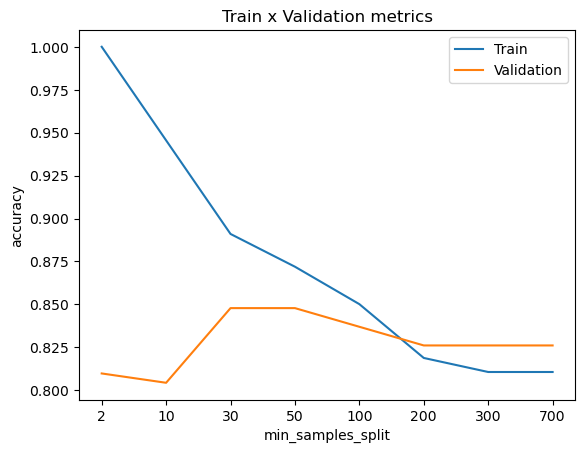

In [92]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
    model = DecisionTreeClassifier(min_samples_split = min_samples_split, random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) 
    predictions_val = model.predict(X_val) 
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

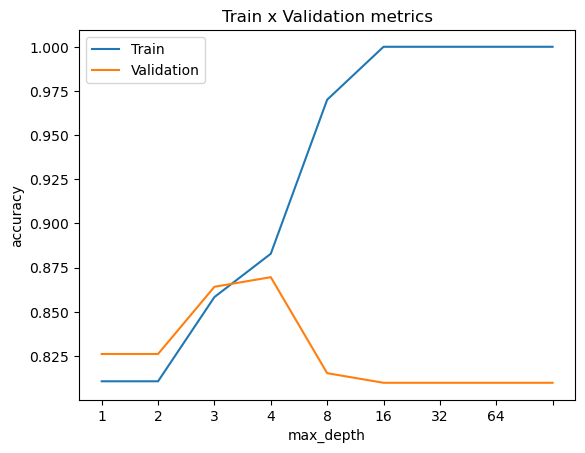

In [93]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    model = DecisionTreeClassifier(max_depth = max_depth,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) 
    predictions_val = model.predict(X_val) 
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

### Training Decision Tree Model

In [94]:
decision_tree_model = DecisionTreeClassifier(min_samples_split = 50, max_depth = 4, random_state = RANDOM_STATE).fit(X_train,y_train)

In [95]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_train),y_train):.4f}")
print(f"Metrics validation:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.8665
Metrics validation:
	Accuracy score: 0.8696


## Random Forest Model

### Finding optimal hyperparameters: minimum samples split, max depth, and n_jobs estimators

In [96]:
n_estimators_list = [10,50,100,500]

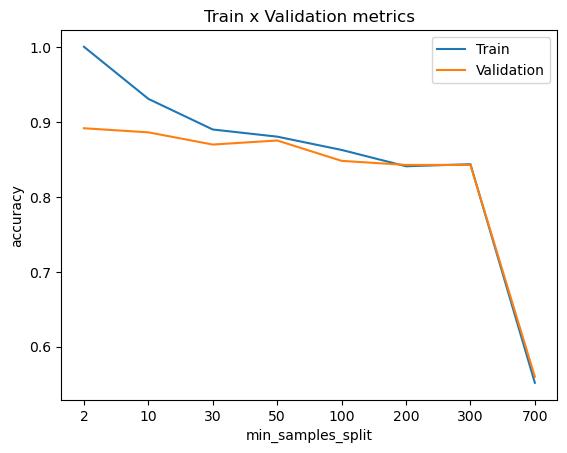

In [97]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
    model = RandomForestClassifier(min_samples_split = min_samples_split, random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) 
    predictions_val = model.predict(X_val) 
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list) 
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

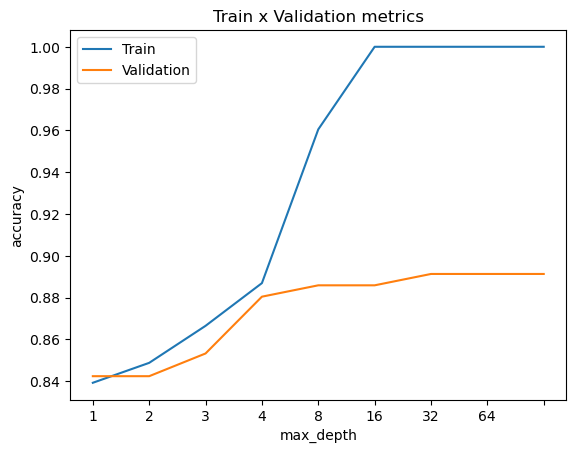

In [98]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    model = RandomForestClassifier(max_depth = max_depth, random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) 
    predictions_val = model.predict(X_val) 
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

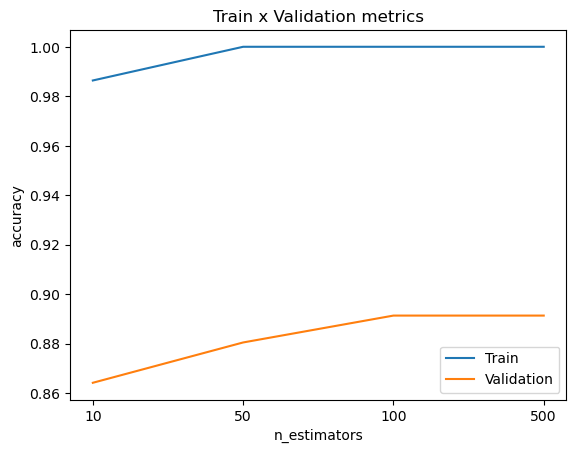

In [99]:
accuracy_list_train = []
accuracy_list_val = []
for n_estimators in n_estimators_list:
    model = RandomForestClassifier(n_estimators = n_estimators,random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

### Training Random Forest Model

In [100]:
random_forest_model = RandomForestClassifier(n_estimators = 100, max_depth = 16, min_samples_split = 10).fit(X_train,y_train)

In [101]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.9414
Metrics test:
	Accuracy score: 0.8859


## XGBoost Model

In [102]:
n = int(len(X_train)*0.8)

In [103]:
X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n], X_train[n:], y_train[:n], y_train[n:]

### Training XGBoost Model

In [104]:
xgb_model = XGBClassifier(n_estimators = 500, learning_rate = 0.1,verbosity = 1, random_state = RANDOM_STATE, early_stopping_rounds = 10)
xgb_model.fit(X_train_fit,y_train_fit, eval_set = [(X_train_eval,y_train_eval)])

[0]	validation_0-logloss:0.64479
[1]	validation_0-logloss:0.60569
[2]	validation_0-logloss:0.57481
[3]	validation_0-logloss:0.54947
[4]	validation_0-logloss:0.52973
[5]	validation_0-logloss:0.51331
[6]	validation_0-logloss:0.49823
[7]	validation_0-logloss:0.48855
[8]	validation_0-logloss:0.47888
[9]	validation_0-logloss:0.47068
[10]	validation_0-logloss:0.46507
[11]	validation_0-logloss:0.45832
[12]	validation_0-logloss:0.45557
[13]	validation_0-logloss:0.45030
[14]	validation_0-logloss:0.44653
[15]	validation_0-logloss:0.44213
[16]	validation_0-logloss:0.43948
[17]	validation_0-logloss:0.44088
[18]	validation_0-logloss:0.44358
[19]	validation_0-logloss:0.44493
[20]	validation_0-logloss:0.44294
[21]	validation_0-logloss:0.44486
[22]	validation_0-logloss:0.44586
[23]	validation_0-logloss:0.44680
[24]	validation_0-logloss:0.44925
[25]	validation_0-logloss:0.45383


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=55, ...)

In [105]:
xgb_model.best_iteration

16

In [106]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.9251
Metrics test:
	Accuracy score: 0.8641
